# Проверка гипотез по увеличению выручки в интернет-магазине
# Описание проекта

**Цель проекта**

Необходимо приоретизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты. 

**Задачи проекта**
- провести приоритизацию гипотез
- проанализировать A/B-тест
- по результатам A/B-теста сделать вывод и принять решение о дальнейших действиях

**Описание данных**

Файл /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Открываем-файлы-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файлы-с-данными-и-изучаем-общую-информацию-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открываем файлы с данными и изучаем общую информацию</a></span><ul class="toc-item"><li><span><a href="#файл-hypothesis.csv" data-toc-modified-id="файл-hypothesis.csv-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>файл hypothesis.csv</a></span></li><li><span><a href="#файл-orders.csv" data-toc-modified-id="файл-orders.csv-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>файл orders.csv</a></span></li><li><span><a href="#файл-visitors.csv" data-toc-modified-id="файл-visitors.csv-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>файл visitors.csv</a></span></li></ul></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Метод-ICE" data-toc-modified-id="Метод-ICE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метод ICE</a></span></li><li><span><a href="#Метод-RICE" data-toc-modified-id="Метод-RICE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метод RICE</a></span></li><li><span><a href="#Сравнительный-анализ-двух-методик" data-toc-modified-id="Сравнительный-анализ-двух-методик-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнительный анализ двух методик</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Изучение-общих-данных" data-toc-modified-id="Изучение-общих-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение общих данных</a></span></li><li><span><a href="#Подготовка-кумулятивных-данных-по-заказам-и-посетителям" data-toc-modified-id="Подготовка-кумулятивных-данных-по-заказам-и-посетителям-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка кумулятивных данных по заказам и посетителям</a></span></li><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>График кумулятивной выручки по группам</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График кумулятивного среднего чека по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам" data-toc-modified-id="График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>График кумулятивного среднего количества заказов на посетителя по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#Определение-границы-для-аномальных-пользователей" data-toc-modified-id="Определение-границы-для-аномальных-пользователей-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Определение границы для аномальных пользователей</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов" data-toc-modified-id="Точечный-график-стоимостей-заказов-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Точечный график стоимостей заказов</a></span></li><li><span><a href="#Определение-границы-для-аномальных-заказов" data-toc-modified-id="Определение-границы-для-аномальных-заказов-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Определение границы для аномальных заказов</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Результаты-A/B-теста" data-toc-modified-id="Результаты-A/B-теста-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>Результаты A/B-теста</a></span></li></ul></li><li><span><a href="#Вывод-по-проведенному-исследованию" data-toc-modified-id="Вывод-по-проведенному-исследованию-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод по проведенному исследованию</a></span></li></ul></div>

## Загрузка данных и подготовка их к анализу

### Подключение библиотек

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

### Открываем файлы с данными и изучаем общую информацию

#### файл hypothesis.csv

In [10]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [11]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


У нас есть список из 9 гипотез для увеличения выручки с параметрами Reach, Impact, Confidence, Efforts.

Приведем названия колонок к нижнему регистру:

In [14]:
hypothesis.columns = hypothesis.columns.str.lower()

#### файл orders.csv

In [16]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [17]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [19]:
orders.duplicated().sum()

0

В файле 1197 строки, пропуски и дубликаты отсутствуют.

Приведём названия колонок к "змеиному" регистру, а значения в колонке date в формат datetime:

In [22]:
orders = orders.rename(columns=\
                       {'transactionId': 'transaction_id', 
                        'visitorId': 'visitor_id'})

In [23]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

#### файл visitors.csv

In [25]:
try:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [26]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [27]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [28]:
visitors.duplicated().sum()

0

В файле 62 строки, пропуски и дубликаты отсутствуют.

Приведём значения в колонке date в формат datetime:

In [31]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Предобработка данных завершена.

## Приоритизация гипотез

В файле hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort: 

- Reach — скольких пользователей затронет изменение, которое мы хотим внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Применим методы ICE и RICE для приоритизации гипотез:

### Метод ICE

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [38]:
hypothesis['ICE']=round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 1)
hypothesis[['hypothesis', 'ICE']].sort_values(by=['ICE'], ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Вывод:

По методу ICE первые три места занимают гипотезы под номерами 8, 0, 7:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Метод RICE

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [42]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by=['RICE'], ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод:

По методу RICE первые три места занимают гипотезы под номерами 7, 2, 0:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Сравнительный анализ двух методик

In [45]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


Вывод:

Параметр reach (охват пользователей) изменил порядок приоритизации гипотез:

1) При применении метода RICE на первое место с большим отрывом вышла 7 гипотеза (в ICE она была на третьем месте). Так получилось потому, что параметр Reach (охват пользователей) у этой гипотезы составил максимальные 10 баллов, в то время, как у других гипотез этот параметр меньше.

2) Гипотеза под номером 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) сместилась со второго места (по методике ICE) на третье (по методике RICE) - охват пользователей по этой гипотезе оценен в 3 балла, поэтому она сместилась ниже в приоритете.

3) Гипотеза 8 (Запустить акцию, дающую скидку на товар в день рождения) была на 1м месте по методике ICE и опустилась на 5е место по методике RICE, так как она охватывает совсем небольшой процент пользователей (оценен на 1 балл).

4) Также в топ-3 на втором месте по методике RICE появилась гипотеза 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа). Она охватывает достаточно большой объем пользователей (8 баллов) и это повлияло на её приоритет настолько, что она вырвалась на второе место. 

## Анализ A/B-теста

### Изучение общих данных

Мы провели A/B-тест и получили результаты, которые описаны в датафреймах orders и visitors.

Перед проведением анализа детальнее изучим полученные данные:

In [51]:
print('Группы в датафрейме orders:', orders['group'].unique())
print('Группы в датафрейме visitors:', visitors['group'].unique())

Группы в датафрейме orders: ['B' 'A']
Группы в датафрейме visitors: ['A' 'B']


В датафреймах orders и visitors заказы разделены на две тестируемые группы - A и B.

In [53]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


Тест проводился один месяц - с 01.08.2019 по 31.08.2019 г.

In [55]:
orders.groupby('group').agg({'visitor_id':'nunique', 'revenue':'sum'})

,visitor_id,revenue
group,,
A,503,4084803
B,586,5907760


Количество уникальных пользователей, сделавших заказ, в группе B больше на 86 человек (на 17%), чем в группе A. Также пользователи в группе B принесли выручки на 1,8 млн р больше(44%).

Проверим, не попали какие-либо пользователи в обе группы:

In [58]:
double_id=orders.groupby('visitor_id', as_index=False).agg({'group':'nunique'})
double_id.columns=['user_id', 'count_group']
double_id=double_id[double_id['count_group']>1]
print('Количество пользователей, присутствующих в обеих группах:', double_id['user_id'].count())
print('Общее количество уникальных пользователей:', len((orders['visitor_id'].unique())))

Количество пользователей, присутствующих в обеих группах: 58
Общее количество уникальных пользователей: 1031


Всего есть 58 пользователей, которые вошли в обе группы.
Они составляют 5,6% от общего числа уникальных пользователей.
Получается, что 58 пользователей видели разные версии исследуемой страницы в ходе одного исследования, и неизвестно, какая именно повлияла на их решения. Значит, и результаты теста по таким пользователям нельзя интерпретировать однозначно. Однако, удалив таких пользователей из датафрейма orders, мы не сможем на данном этапе удалить их из таблицы visitors, так как в ней отсутствуют id пользователей. 

Дадим рекомендацию проверить корректность отработки метода показа пользователям разных версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите.

Необходимо учесть данную ошибку в ходе проведения следующих исследований.

### Подготовка кумулятивных данных по заказам и посетителям

Для построения графиков и анализа полученных данных, необходимо собрать кумулятивные данные по заказам и посетителям:

In [65]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Таким образом, мы собрали датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Теперь можно приступать к построению графиков и анализу полученных данных.

### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам:

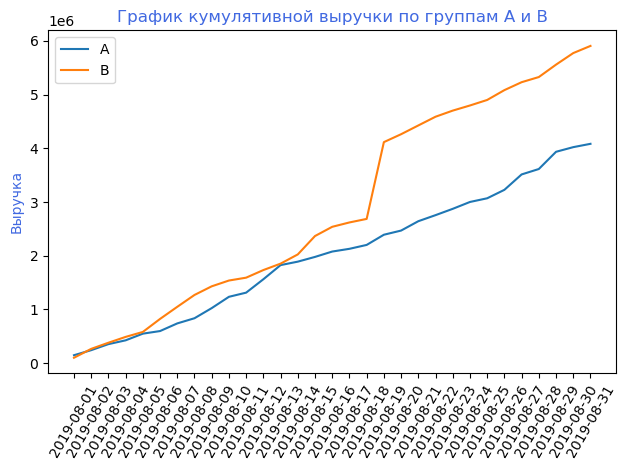

In [70]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xticks(orders['date'].unique(), rotation = 60)
plt.ylabel('Выручка', color='royalblue')
plt.title('График кумулятивной выручки по группам A и B', color='royalblue')
plt.tight_layout()
plt.legend()
plt.show();

Вывод:

Выручка почти равномерно увеличивается в течение всего теста. Однако, группа B резко вырвалась вперед в точке с датой 17-08-2019 и продолжала лидировать весь остаток теста. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позже.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

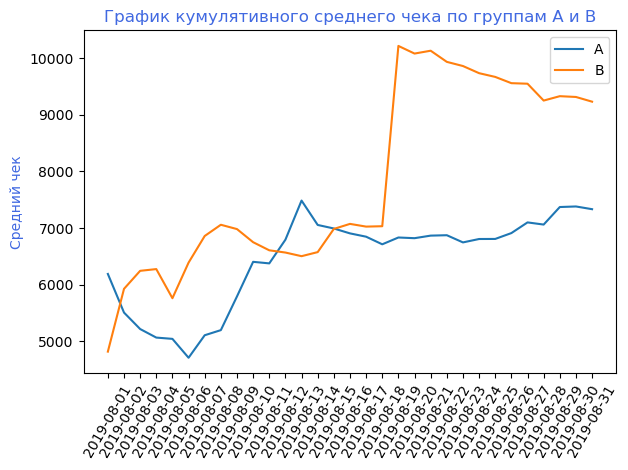

In [75]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(orders['date'].unique(), rotation = 60)
plt.ylabel('Средний чек', color='royalblue')
plt.title('График кумулятивного среднего чека по группам A и B', color='royalblue')
plt.tight_layout()
plt.legend()
plt.show();

Вывод:

Кумулятивное значение среднего чека по сегментам колеблется. 
Средний чек становится равномерным ближе к концу теста: для группы B был резкий скачок 17 августа 2019 г., в группу B в эту дату попали крупные заказы, после этого средний чек установился для обеих групп - для группы B он выше, чем для группы A. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительно различия кумулятивного среднего чека группы B к группе A:

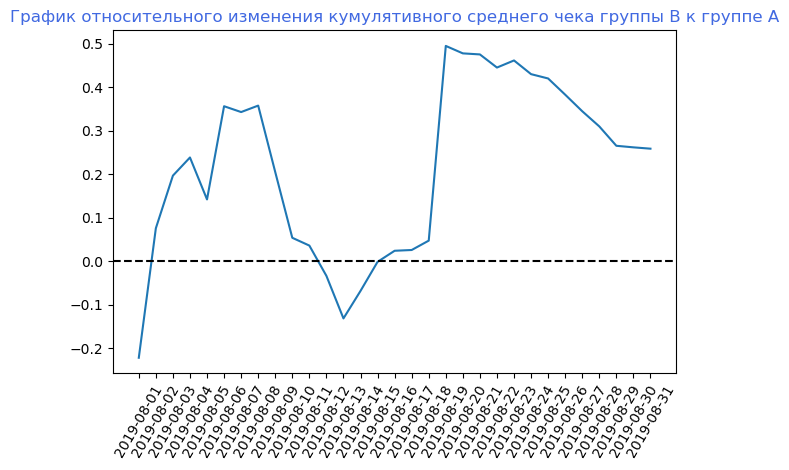

In [80]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')


plt.xticks(orders['date'].unique(), rotation = 60)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', color='royalblue')
plt.tight_layout()
plt.show();

Вывод:

Результаты теста значительно и резко менялись в несколько дат. Видимо, тогда были совершены аномальные заказы. После скачка в середине августа, средний чек группы B стабильно выше группы A.

### График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам A и B:

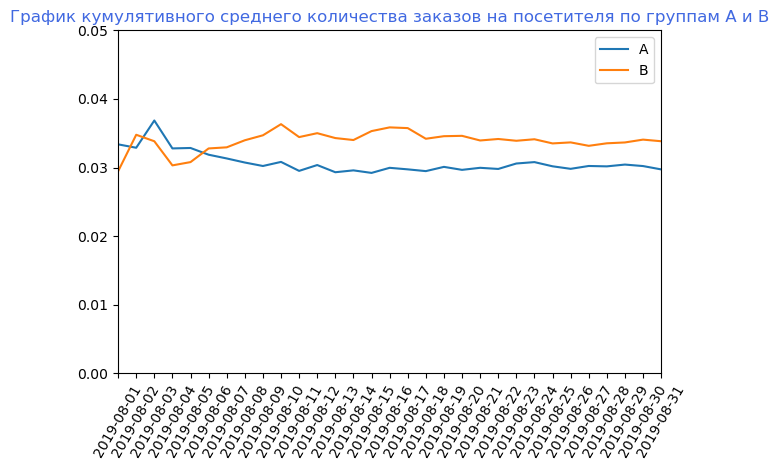

In [84]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

plt.xticks(orders['date'].unique(), rotation = 60)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам A и B', color='royalblue')
plt.legend()
plt.tight_layout()
plt.show();

Вывод:

В начале теста группа A имела более высокое значение среднего количества заказов на посетителя, но 5 августа группа B вырвалась вперед и зафиксировалась на примерно одном значении, больше значения сегмента A.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного различия кумулятивной конверсии группы B к группе A:

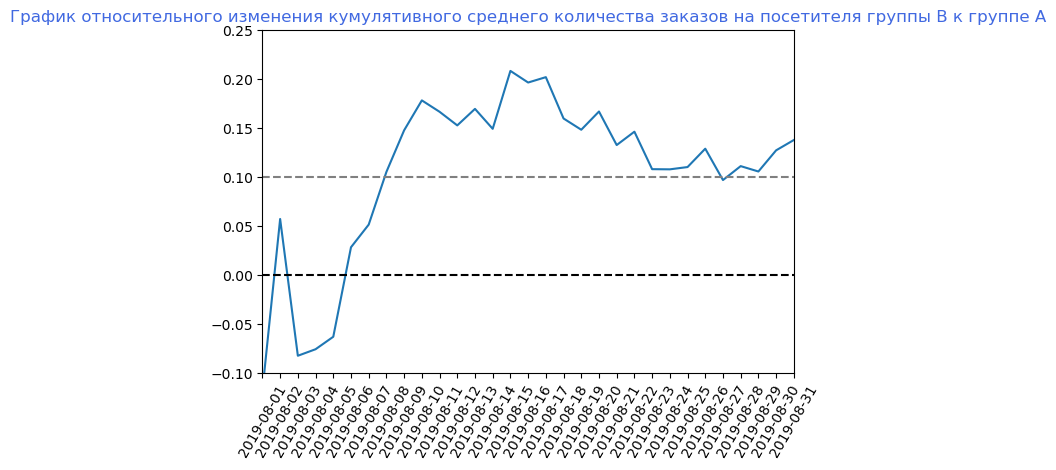

In [89]:
#объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(orders['date'].unique(), rotation = 60)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', color='royalblue')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.1, 0.25])
plt.tight_layout()
plt.show();

Вывод:

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но достигнув точки 10% опять начала рост.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Также стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

Для анализа выбросов и всплесков подготовим данные: подсчитаем количество заказов по пользователям и построим точечный график.

In [94]:
#создадим датафрейм по количеству заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.

Построим гистрограмму распределения количества заказов на одного пользователя.

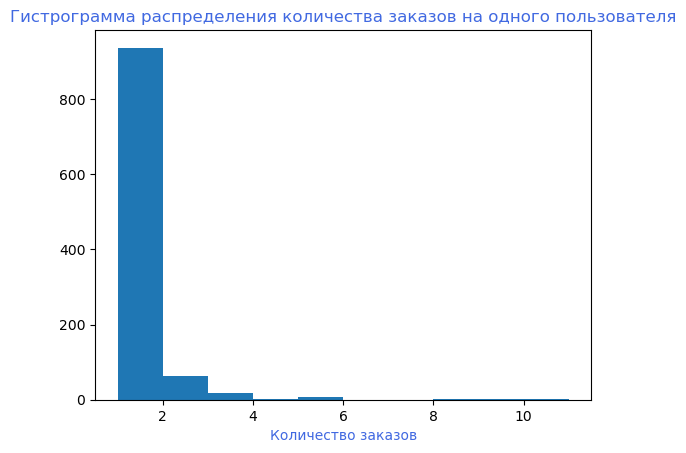

<Figure size 250x100 with 0 Axes>

In [97]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя', color='royalblue')
plt.xlabel('Количество заказов', color='royalblue')
plt.figure(figsize=(2.5, 1))
plt.show();

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

Построим точечный график количества заказов по пользователям:

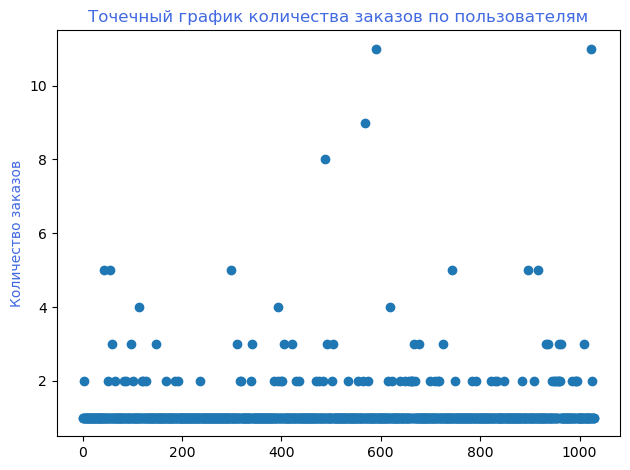

In [100]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

#строим точечный график количества заказов по пользователям
plt.scatter(x_values, ordersByUsers['orders'])

plt.ylabel('Количество заказов', color='royalblue')
plt.title('Точечный график количества заказов по пользователям', color='royalblue')
plt.tight_layout()
plt.show();

Вывод:

Выводы подтверждаются: большинство пользователей сделали заказ 1 раз, много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Определение границы для аномальных пользователей

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [104]:
print('90-й, 95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [90, 95, 99]))

90-й, 95-й и 99-й перцентили количества заказов на пользователя: [1. 2. 4.]


Вывод:

Не более 10% пользователей оформляли больше 1 заказа, не более 5% оформляли больше, чем 2 заказа. И 1% пользователей заказывали более четырёх раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

Изучим гистограмму распределения стоимостей заказов: 

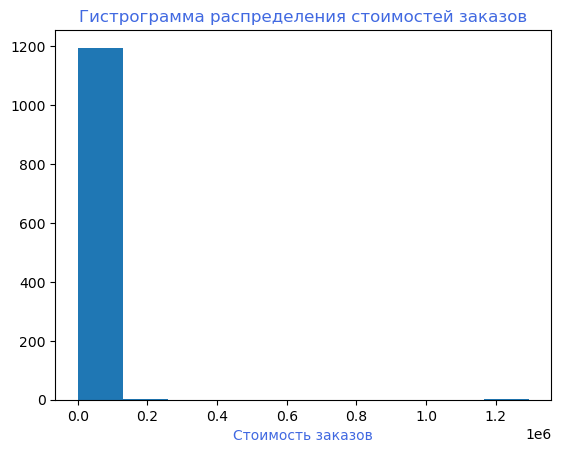

In [109]:
plt.hist(orders['revenue'])
plt.title('Гистрограмма распределения стоимостей заказов', color='royalblue')
plt.xlabel('Стоимость заказов', color='royalblue')
plt.show();

Большинство заказов оформлено на сумму до 100 тыс.руб., на гистограмме также видны аномалии - заказы в районе 200 т.р. и 1,2 млн.руб.

Построим точечный график стоимостей заказов:

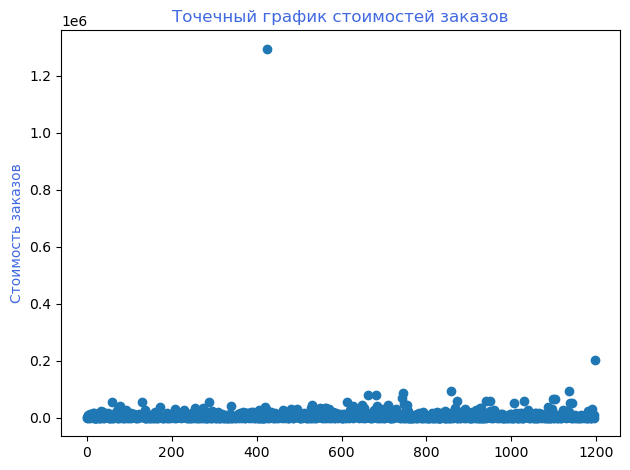

In [112]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.ylabel('Стоимость заказов', color='royalblue')
plt.title('Точечный график стоимостей заказов', color='royalblue')
plt.tight_layout()
plt.show();

Из-за аномально большого заказа в размере 129450 р. все значения на графике слились в одну прямую.

Построим график без этого выброса:

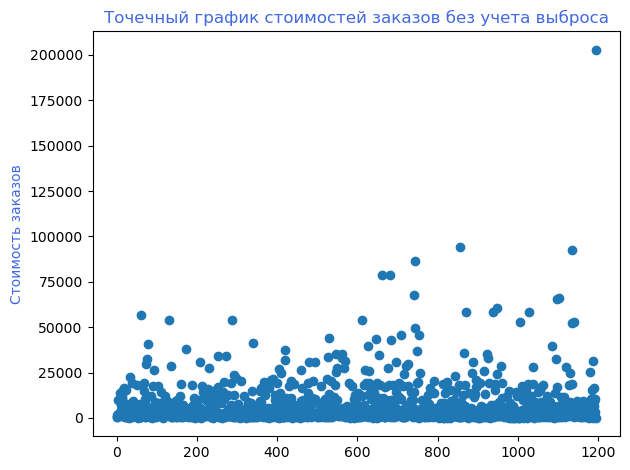

In [114]:
orders1=orders[orders['revenue']!=1294500]
x_values1 = pd.Series(range(0,len(orders1['revenue'])))
plt.scatter(x_values1, orders1['revenue']) 

plt.ylabel('Стоимость заказов', color='royalblue')
plt.title('Точечный график стоимостей заказов без учета выброса', color='royalblue')
plt.tight_layout()
plt.show();

Вывод:

По такому графику можно сделать вывод, что большинство заказов недорогие - меньше 25 тыс руб.
Также есть немного дорогих заказов - от 30 до 200 тыс руб.

### Определение границы для аномальных заказов

Посчитаем выборочные перцентили стоимостей заказов:

In [121]:
print('90-й, 95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [90, 95, 99]))

90-й, 95-й и 99-й перцентили стоимости заказов: [18168.  28000.  58233.2]


Вывод:

Не более 10% заказов дороже 18168 руб., не более 5% заказов дороже 28000 руб. и не более 1% дороже 58233 рублей. Установим верхнюю границу стоимостей заказов в 28000 руб. и отсеем аномальные заказы по ней.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

Для проверки гипотез подготовим данные:

In [127]:
#создадим датафрейм с количеством пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#создадим датафрейм с количеством пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#создадим датафрейм с количеством пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#создадим датафрейм с количеством пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#создадим датафрейм с количеством заказов и выручкой в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#создадим датафрейм с суммарным числом заказов и выручкой до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#создадим датафрейм с количеством заказов и выручкой в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#создадим датафрейм с суммарным числом заказов и выручкой до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим созданные датафреймы в один
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId', 'orders'.
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [130]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [132]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Проверим выборки критерием Манна-Уитни и выведем относительный прирост числа заказов для группы B:

In [134]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
относительный прирост среднего числа заказов группы B: 0.138


Вывод:

Анализ «сырых» данных сообщает, что в среднем числе заказов между группами A и B есть статистически значимые различия.

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

Относительный прирост среднего группы B к конверсии группы A равен 13,8%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
Также найдём относительные различия в среднем чеке между группами:

In [140]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост среднего чека группы B:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
относительный прирост среднего чека группы B: 0.259


Вывод:

P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Однако, при отсутствии статистической значимости, средний чек группы B выше среднего чека группы A почти на 26%.

Сравним даную метрику по "очищенным" данным ниже и узнаем, как сильно влияют на нее выбросы.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее найденные 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям.

А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders.
Объединим их в таблице abnormalUsers. 

In [147]:
#вычислим количество аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
63


Всего 63 аномальных пользователя. 

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [153]:
#создадим переменные sampleAFiltered и sampleBFiltered,
#в которых сохраним очищенные данные о заказах — не включая аномальных пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [155]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего числа заказов группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.018
относительный прирост среднего числа заказов группы B: 0.148


Вывод:

p-value меньше 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов по "очищенным" данным между группами нет, отвергаем.

Относительный прирост среднего группы B к конверсии группы A равен 14,8%, по сравнению с "сырыми" данными увеличился на 1% (по сырым данным прирост составлял 13,8%).

Как и в случае с "сырыми" данными, в среднем числе заказов между группами A и B есть статистически значимые различия.

Сегмент B значительно лучше сегмента A.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [162]:
print('p-value =',
      '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительный прирост среднего чека группы B:',
      "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.977
относительный прирост среднего чека группы B: -0.017


Вывод:

p-value вырос, а средний чек для группы B стал ниже среднего чека группы A на 1,7% в отличие от "сырых" данных, где средний чек группы B был выше на 26%.
Однако, статистическая значимость так и не достигнута.

### Результаты A/B-теста

- по конверсии между группами A и B (как по сырым данным, так и по очищенным) есть статистически значимые различия;
- по среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

## Вывод по проведенному исследованию

Имеющиеся факты:
- A/B тест идет уже месяц - достаточно долгий срок для принятия решения о том, стоит ли продолжать или останавливать тест, также нужно учесть то, что каждый день теста - это дополнительные затраты для бизнеса.
- График различия среднего количества заказов на посетителя за период проведения теста близок к стабилизации - существенных колебаний на графике уже не видно. Результаты группы B лучше группы A. 
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий - прирост среднего числа заказов по "сырым" данным составил 13.8%, а по "очищенным" - 14.8%. Сегмент B значительно лучше сегмента A.
- Средний чек становится равномерным ближе к концу теста: для группы B он выше, чем для группы A. 
- Однако, нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.



**Исходя из обнаруженных фактов, тест следует остановить и признать победу группы B в отношении среднего количества заказов.**

**Также нужно иметь в виду, что в части среднего чека статистической разницы между группами нет.**

**Таким образом, не учитывая аномальный заказ на 1,3 млн р, который попал в группу B, на выручку компании не повлияли тестируемые изменения в ходе данного исследования.**


Также необходимо обратить внимание на корректность отработки метода показа пользователям разных версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите. Необходимо учесть ошибку разделения пользователей на группы в ходе следующих исследований.